## **Problem Statement**

You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 

**Data:**

The historical sales data is available as a compressed file here. 

https://docs.google.com/spreadsheets/d/17MbVyO-sasOk0KswkdgEgOYdVES9JZyaIxOVQ1MZkLs/edit?usp=sharing

**Features**:

age (numeric)
job : type of job
marital : marital status
educational_qual : education status
call_type : contact communication type
day: last contact day of the month (numeric)
mon: last contact month of year
dur: last contact duration, in seconds (numeric)
num_calls: number of contacts performed during this campaign and for this client 
prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
Output variable (desired target):
y - has the client subscribed to the insurance?


**Minimum Requirements:**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. 

AUROC must be used as a metric to evaluate the performance of the models.

### ***IMPORT THE NEEDED ONES***

**SUPERVISED LEARNING PROBLEM:**
  1. We have target variable y.
  2. It is classification problem.
  3. y is a discrete variable.

We are trying to build a ML model to predict if a client will subscribe to the insurance.

When we are solving classification problem, We want to check is it balanced or imbalanced

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 

from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings("ignore")


## **IMPORT THE DATASET**

In [ ]:
data=pd.read_csv('Customer Conversion Prediction - Customer Conversion Prediction.csv')

In [ ]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


### ***CHECKING BALANCED OR NOT***

In [ ]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
((39922)/(39922+5289))*100

88.30151954170445

In [ ]:
((5289)/(39922+5289))*100

11.698480458295547

The target column is imbalanced here,

1. MAJORITY CLASS is from no (88.3%)
2. MINORITY CLASS is from yes (11.6%)

In [ ]:
data['y']=data['y'].map({'yes':1,'no':0})

## **DATA PREPROCESSING**

In [ ]:
data.shape

(45211, 11)

# **CLEAN THE DATA**
To clean the data i'm going to do 4 steps:
  
  1. Missing values(data) and checking duplicate data
  2. Spelling correction
  3. Data format check (datatype) 
  4. Outlier check

In [ ]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


## **First step is to check is there any missing value(data) & Duplicates data**

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

*There are no null values in any columns.*

In [ ]:
data.duplicated().sum()

6

Here, We got 6 duplicates in data.
We can drop the duplicates.

In [ ]:
data=data.drop_duplicates()
data.duplicated().sum()

0

*We done the first part.*

## **Second step is to check is data in right format**

In [ ]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

*Every datatypes are set well no need to change.*

## **Third step is to check is there any spelling mistakes in object datas:**

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
print(data['job'].unique())
print(data['marital'].unique())
print(data['education_qual'].unique())
print(data['call_type'].unique())
print(data['mon'].unique())
print(data['y'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[0 1]


*There is no spelling mistakes*

## **Fourth step is there any outliers in the given data**

In [ ]:
data.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


AGE & DAY

In [ ]:
outlier=[]
mean,std=40.937087,10.619130
for i in data['age']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

outlier1=[]
mean1,std1=15.80688,8.32234	
for i in data['day']:
    x = (i-mean1)/std1
    if x > 3 or x <-3:
        outlier1.append(i)
print(len(outlier1))

381
0


AGE: Having a valid outlier...min age-18,max age-95.

DAY: There is no outliers...min -1, max -31

DUR & NUM_CALLS

In [ ]:
outlier=[]
mean,std=258.183055,257.538504
for i in data['dur']:
    x = (i-mean)/std
    if x > 3 or x <-3:
        outlier.append(i)
print(len(outlier))

outlier1=[]
mean1,std1=2.763898,3.098189	
for i in data['num_calls']:
    x = (i-mean1)/std1
    if x > 3 or x <-3:
        outlier1.append(i)
print(len(outlier1))

963
840


DURATION: Having a valid outliers...min-0,max-4918(nearly 1hr 20 minutes).

NUM_CALLS: Having a valid outliers...min-1,max-63

## **EDA**
From EDA we can decide the encode type and feature relationships and importance.

##*DISTRIBUTION OF FEATURES*

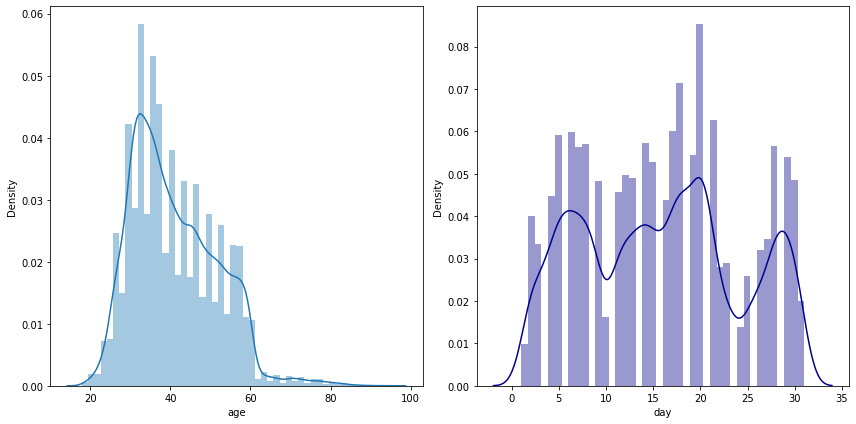

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(data.age)
plt.subplot(1,2,2)
sns.distplot(data.day,color = 'darkblue')
plt.tight_layout()

The AGE distributed between 18 to 95,
the middle age people from 30 to 50 active in insurance processes.

The DAY distributed between 1 to 31

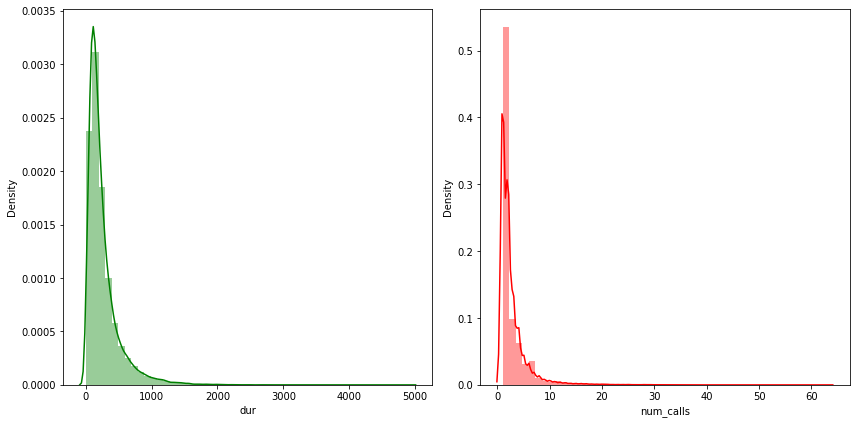

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(data.dur,color = 'green')
plt.subplot(1,2,2)
sns.distplot(data.num_calls,color = 'red')
plt.tight_layout()

The DUR distributed between 0 to 1500.
The NUM_CALLS distributed between 1 to 31.

### *Percentage distribution*

## **JOB**

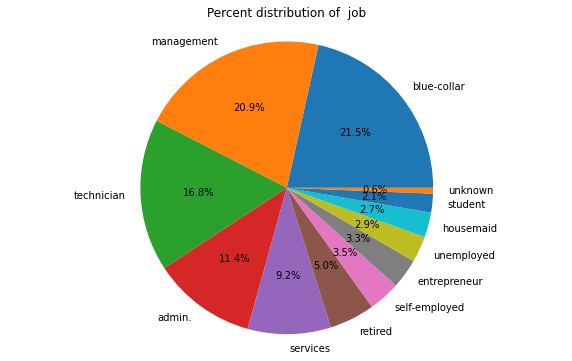

In [ ]:
plt.figure(figsize=(10,6))
df_source = data.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')
plt.show()

In percentage wise distribution in job, we got MANAGEMENT high range and UNKNOWN in low range.

## **MARITAL**

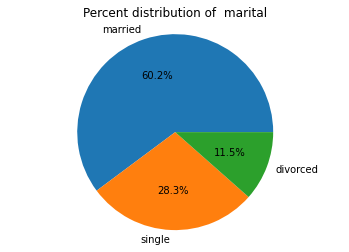

In [ ]:
df_source = data.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')
plt.show()

In percentage wise distribution in marital status, we got MARRIED distributed more than others.
MARRIED peoples have more commitment other than all over here.

### **EDUCATION_QUAL**

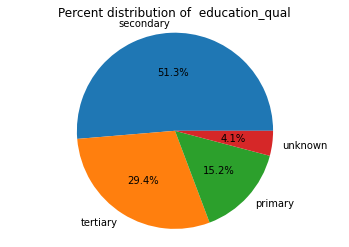

In [ ]:
df_source = data.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')
plt.show()

In percentage wise distribution in equcation qualification, we got SECONDARY distributed  more than others. 
Here, SECONDARY qualified may aware of the insurance benefits other than people over mentioned here.

### **CALL_TYPE**

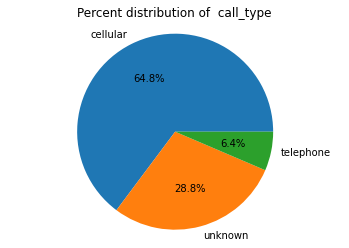

In [ ]:
df_source = data.call_type	.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type')
plt.axis('equal')
plt.show()

In percentage wise distribution in call type,we got cellular  distributed  more than others. 

### **MON**

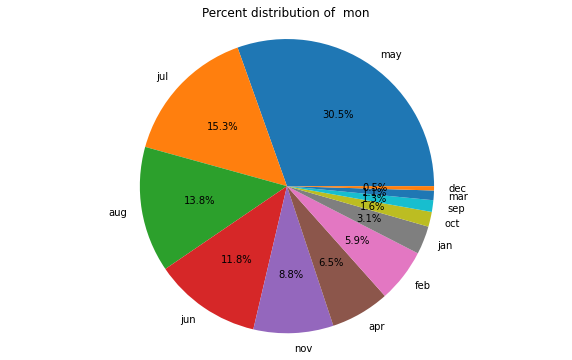

In [ ]:
plt.figure(figsize=(10,6))
df_source = data.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')
plt.show()

In percentage wise distribution in call type,we got SECONDARY distributed as more than others. 

### **PREV_OUTCOME**

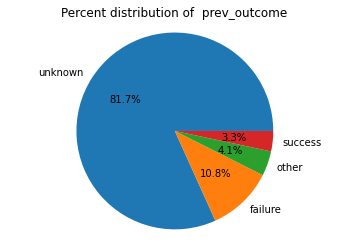

In [ ]:
df_source = data.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')
plt.show()

In percentage wise distribution in previous outcome ,we got unknown distributed more than others. 

### *BAR PLOT PERSPECTIVE FOR Call_type,mon,prev_outcome,prev_outcome*

In [ ]:
A=data['call_type'].groupby(data['call_type']).count()
B=data['mon'].groupby(data['mon']).count()
C=data['prev_outcome'].groupby(data['prev_outcome']).count()
D=data['day'].groupby(data['day']).count()

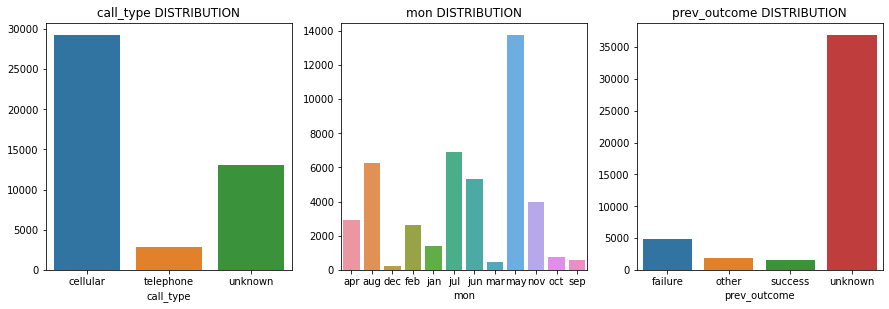

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.barplot(x=A.index,y=A.values,data=data)
plt.title('call_type DISTRIBUTION')

plt.subplot(2,3,2)
sns.barplot(x=B.index,y=B.values,data=data)
plt.title('mon DISTRIBUTION')

plt.subplot(2,3,3)
sns.barplot(x=C.index,y=C.values,data=data)
plt.title('prev_outcome DISTRIBUTION')

plt.show()
plt.tight_layout()

CELLUAR: Cellular distibuted more than others. It may be one of the reason now a days cellular is used more than others.

MON: May distributed more than others. It may be vocation time for the people.

PREV_OUTCOME: Unknown distributed more than others. It may be the people may not used to share the information.


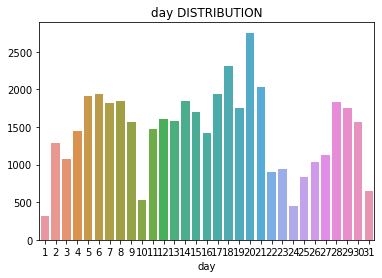

In [ ]:
sns.barplot(x=D.index,y=D.values,data=data)
plt.title('day DISTRIBUTION')
plt.show()

DAY: It may doesn't make any impact to the prediction we can keep it or drop the day column.

### **Percentage of features in together**

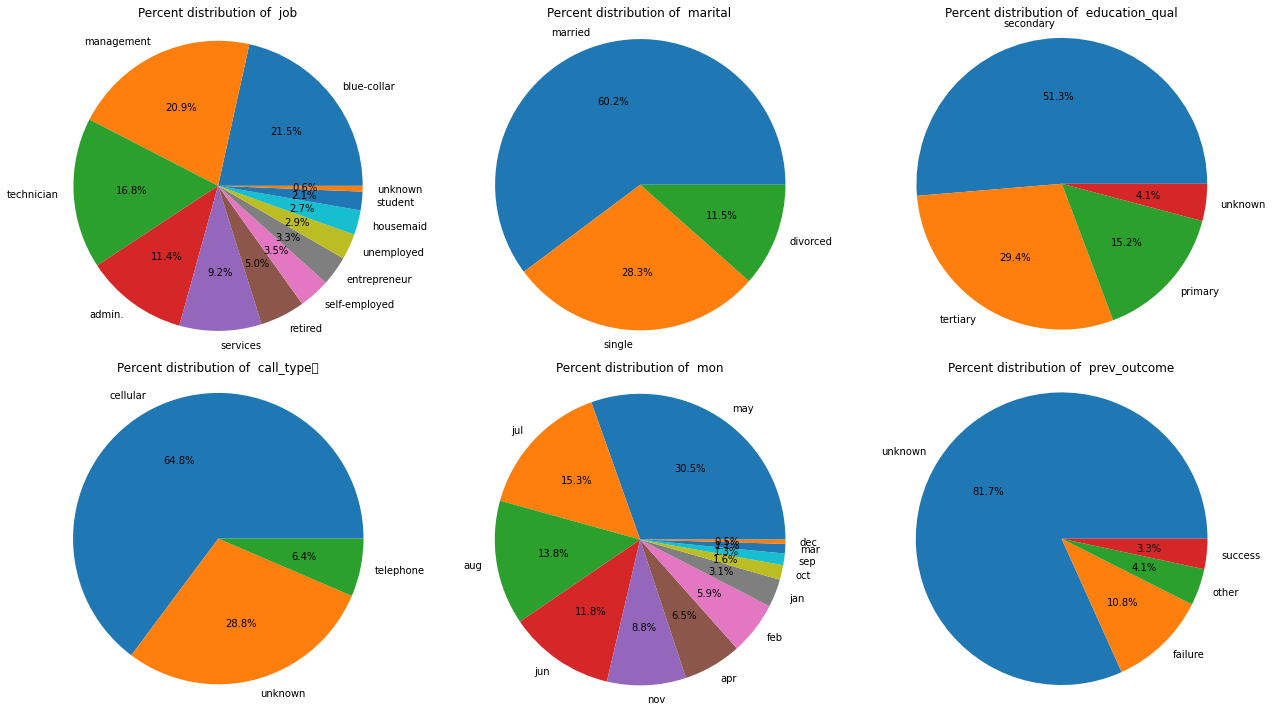

In [ ]:
plt.figure(figsize=(18,10))

plt.subplot(231)
df_source = data.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')

plt.subplot(232)
df_source = data.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')

plt.subplot(233)
df_source = data.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')

plt.subplot(234)
df_source = data.call_type	.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type	')
plt.axis('equal')

plt.subplot(235)
df_source = data.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')

plt.subplot(236)
df_source = data.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')

plt.tight_layout()
plt.show()

### *FOR CONTINUOUS COLUMNS*

AGE

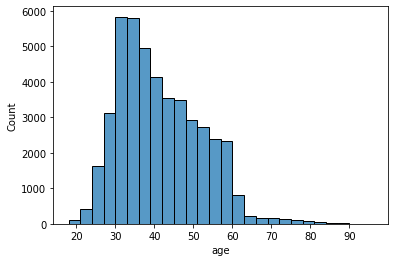

In [ ]:
sns.histplot(data=data, x="age", binwidth=3)
plt.show()

AGE distributed b/w more at the age of 3o plus to 40

DAY

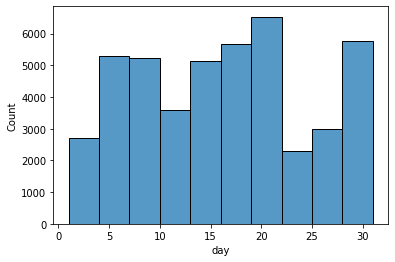

In [ ]:
sns.histplot(data=data, x="day", binwidth=3)
plt.show()

DAY : The middle of the day recieve more than other.

DUR

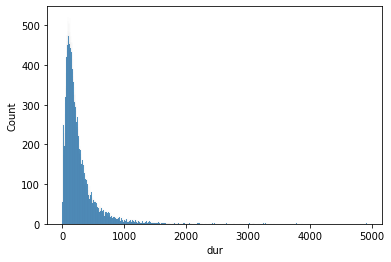

In [ ]:
sns.histplot(data=data, x="dur", binwidth=3)
plt.show()

DUR: Call duration impact the model to subcribe the insurance.

NUM_CALLS

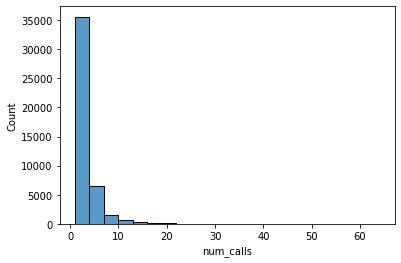

In [ ]:
sns.histplot(data=data, x="num_calls", binwidth=3)
plt.show()

NUM_CALLS: num_calls also one of the reason to sbscribe the insurance.

**ALL CONTINUOUS FEATURES PLOTS TOGETHER HERE FOR OUR OVERVIEW**

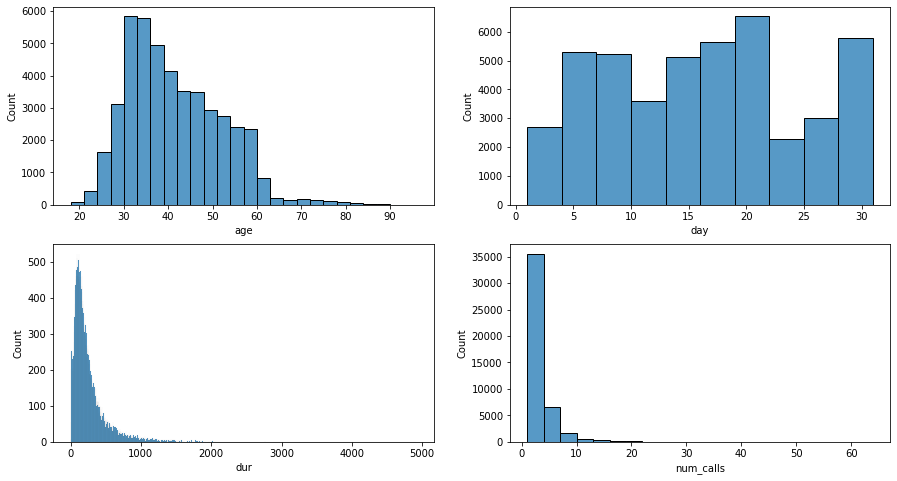

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.histplot(data=data, x="age", binwidth=3)

plt.subplot(222)
sns.histplot(data=data, x="day", binwidth=3)

plt.subplot(223)
sns.histplot(data=data, x="dur", binwidth=3)

plt.subplot(224)
sns.histplot(data=data, x="num_calls", binwidth=3)

plt.show()
plt.tight_layout()

## *FEATURES VS TARGET*

### **JOB**

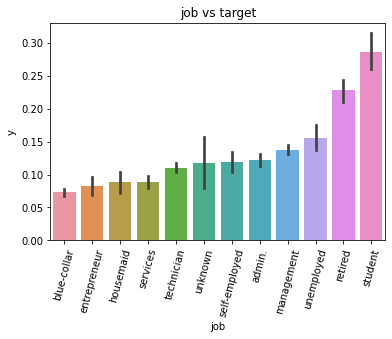

In [ ]:
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')
plt.show()

FROM JOB VS TARGET ,
We got that student are targeted to subcribe the insurance more than others and then, the RETIRED people are targeted more.
We can use one-hot encoding for job because of there is no linear increase in job column.
But it may leads to us to handel more number of columns.SO, here we avoid one-hot and go with label.

    {'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5','self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11}


### **MARITIAL**

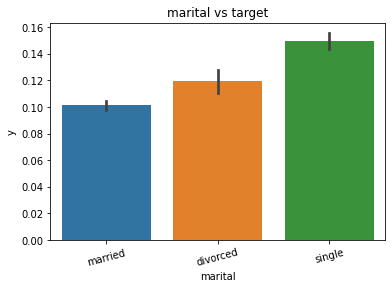

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')
plt.show()
plt.tight_layout()

FROM MARITIAL VS TARGET ,
We got SINGLE people targeted more to subscribe the insurance more than others.

We can use one-hot encoding for marital because, there is no linear increase in marital column.


### **EQUCATION _QUAL**

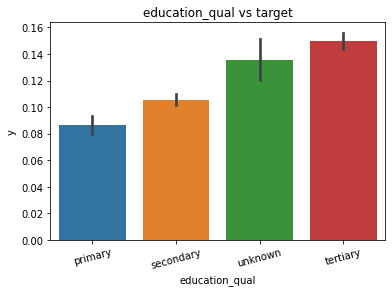

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')
plt.show()
plt.tight_layout()

FROM EQUCATION QUALIFICATION VS TARGET ,
We got TERTIARY people interested more to subscribe the insurance more than others.

Education qualification gives as a linear increase, so we will go with lable encoding.

    {'primary':0,'secondary':1,'unknown':2,'tertiary':3}


### **CALL TYPE**

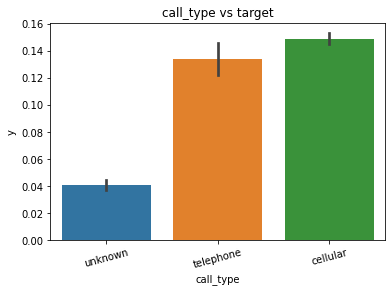

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')
plt.show()
plt.tight_layout()

FROM CALL TYPE VS TARGET ,
We got CELLULAR people interested more to subscribe the insurance more than others.

There is no linear increase in call_type column.so, we want to do one-hot encode. But here we took lable encoding to avoid columns complexity.

          {'unknown':0,'telephone':1,'cellular':2}

### **MON**

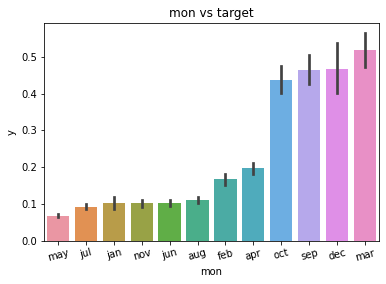

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')
plt.show()
plt.tight_layout()

FROM MONTH VS TARGET ,
We got MAR month scored much amount to subscribe the insurance more than others.
Because, the trend during the month of MARCH is high, as march being the end of financial year in INDIA and the month of DECEMBER is the second highest one as being the financial year in ABROADS.

### **PREV_OUTCOME**

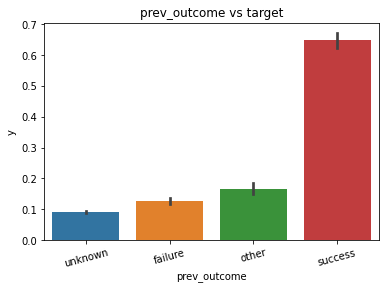

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')
plt.show()
plt.tight_layout()

FROM PREVIOUS OUTCOME VS TARGET ,
We got SUCCESS people interested more to subscribe the insurance more than others.

There is no linear increase in Previous outcome column.SO, we will go with prev_outcome.

### **FEATURES VS TARGET PLOTS TOGETHER**

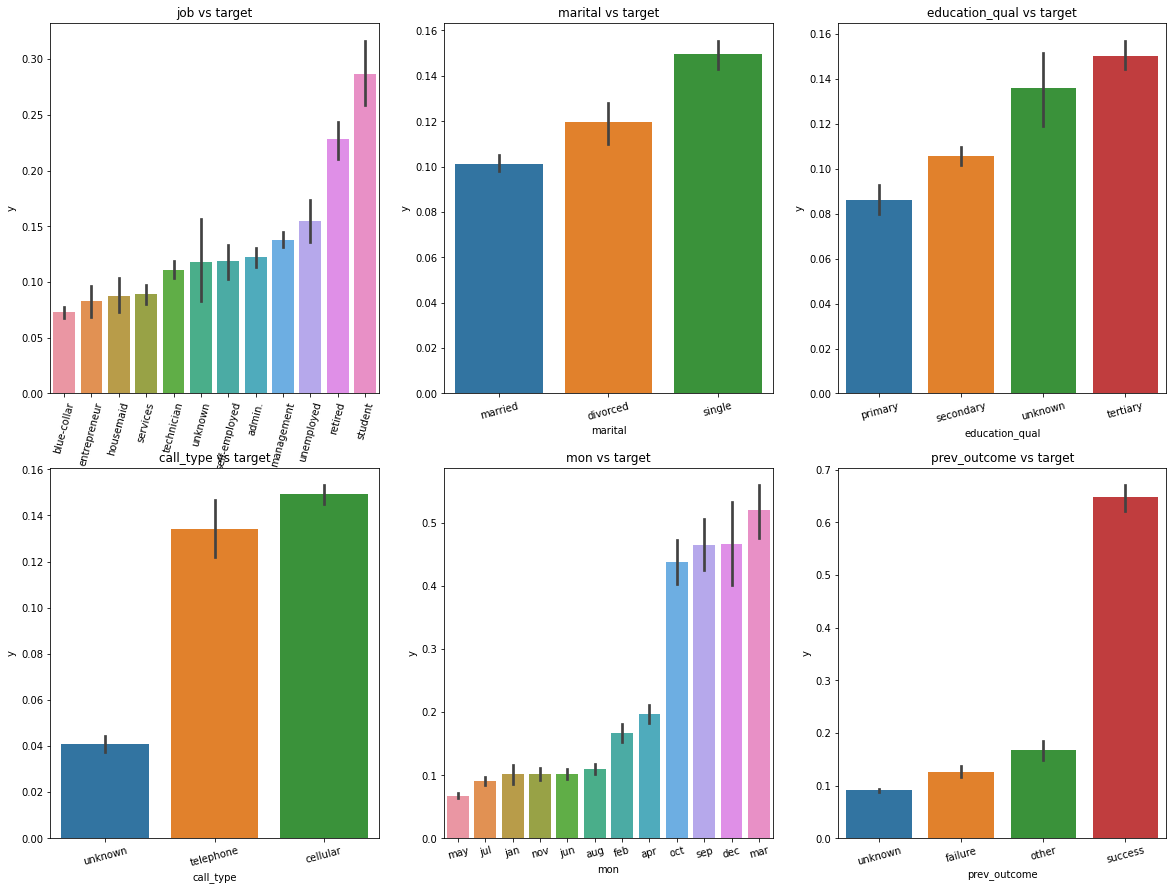

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(231)
sns.barplot(x='job',y='y',data=data,order=data.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=75)
plt.title('job vs target')

plt.subplot(232)
sns.barplot(x='marital',y='y',data=data,order=data.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')

plt.subplot(233)
sns.barplot(x='education_qual',y='y',data=data,order=data.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')

plt.subplot(234)
sns.barplot(x='call_type',y='y',data=data,order=data.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')

plt.subplot(235)
sns.barplot(x='mon',y='y',data=data,order=data.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')

plt.subplot(236)
sns.barplot(x='prev_outcome',y='y',data=data,order=data.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')

plt.show()
plt.tight_layout()

### **CONTINUOUS FEATURES**

AGE

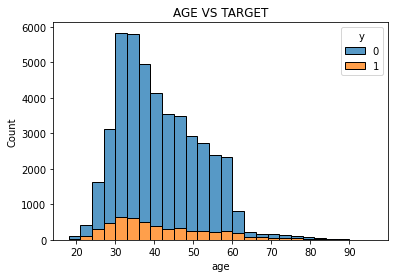

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.histplot(data=data, x="age", hue="y", multiple="stack",binwidth=3)
plt.title('AGE VS TARGET')

plt.show()
plt.tight_layout()

Middle Age peoples insured more than the young and aged ones.

DAY

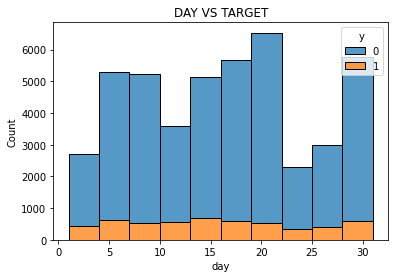

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.histplot(data=data, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('DAY VS TARGET')

plt.show()
plt.tight_layout()

Day may not a reason for subscribtion. Etheir we can drop or not. It's upto we to decide.

DUR

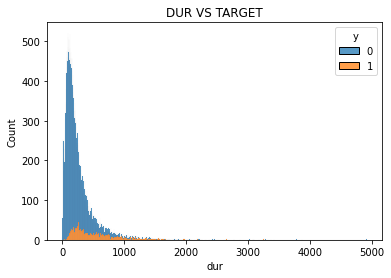

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.histplot(data=data, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('DUR VS TARGET')
plt.show()
plt.tight_layout()

Duration of the call plays a major role in subcribtion.

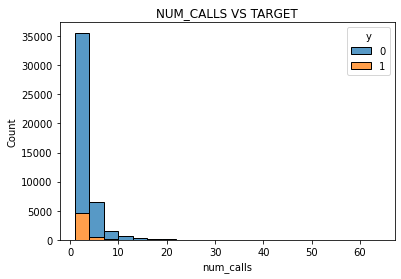

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.histplot(data=data, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('NUM_CALLS VS TARGET')

plt.show()
plt.tight_layout()

Number of calls may be one of the reason for the subscribtion.

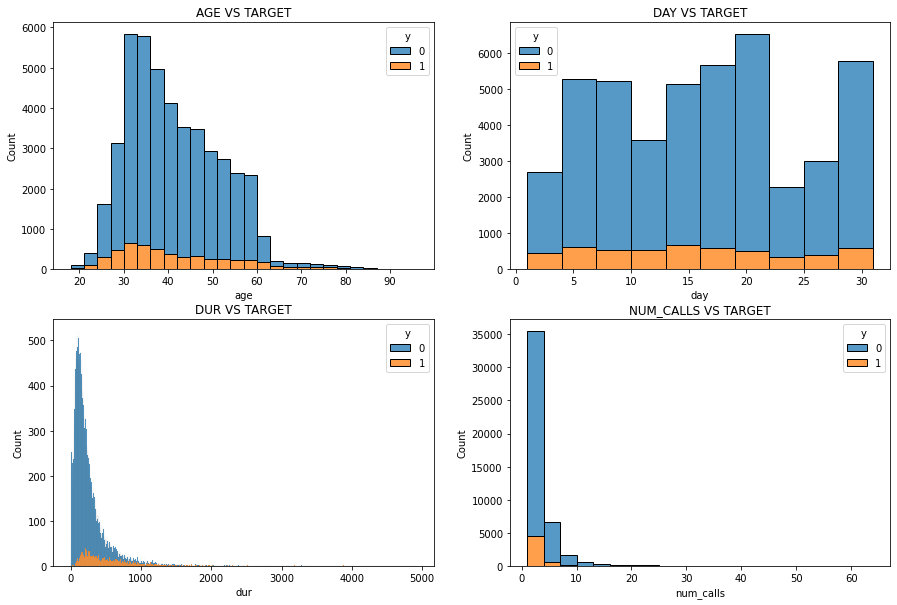

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.histplot(data=data, x="age", hue="y", multiple="stack",binwidth=3)
plt.title('AGE VS TARGET')

plt.subplot(222)
sns.histplot(data=data, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('DAY VS TARGET')

plt.subplot(223)
sns.histplot(data=data, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('DUR VS TARGET')

plt.subplot(224)
sns.histplot(data=data, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('NUM_CALLS VS TARGET')

plt.show()
plt.tight_layout()

From this plot itself we came to know there is an imbalance data in target variable.

## *FEATURE ANALYSIS*

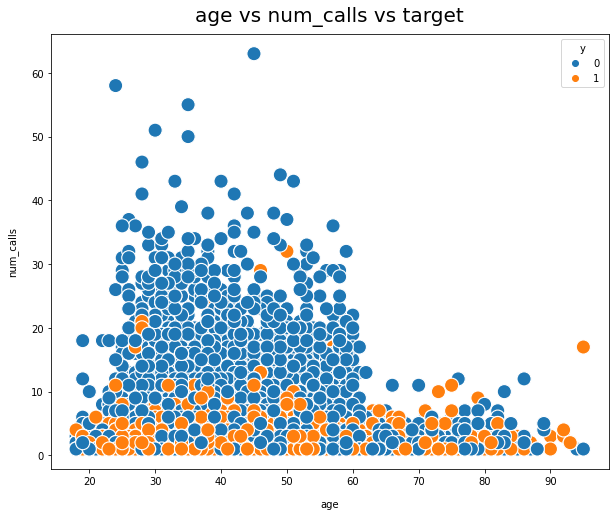

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='num_calls', hue='y', data=data, s=200)
plt.title("age vs num_calls vs target", y=1.015, fontsize=20)
plt.xlabel("age", labelpad=13)
plt.ylabel("num_calls", labelpad=13)
ax = plt.gca()

Age may be the reason for the bank people to increase the number of calls.

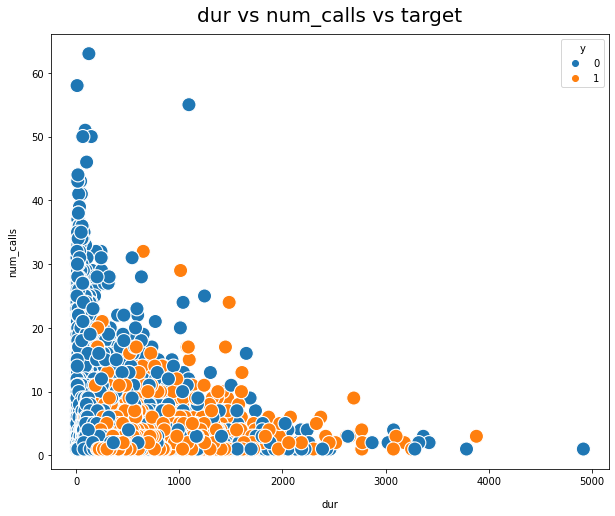

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dur', y='num_calls', hue='y', data=data, s=200)
plt.title("dur vs num_calls vs target", y=1.015, fontsize=20)
plt.xlabel("dur", labelpad=13)
plt.ylabel("num_calls", labelpad=13)
ax = plt.gca()

From this plot we can observe that the people who doesn't pick and who doesn't subcribe the insurance may leads to call more number of times.

Another view of the plot is the insurance subscribed more when they spend more duration to discuss with the bank people to know about insurance policies.

FROM EDA PART,

The 3 feature importance in our point of view:
1. Number calls they made
2. Duration of the call they spend
3. Maritial status

## *ENCODE THE DATA*

In [ ]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

In [ ]:
data.to_csv("data_for_streamlit")

### **LABEL ENCODING**

In [ ]:
data['job']=data['job'].map({'management':8, 'technician':4, 'entrepreneur':1, 'blue-collar':0,
       'unknown':5, 'retired':10, 'admin.':7, 'services':3, 'self-employed':6,
       'unemployed':9, 'housemaid':2, 'student':11})
data['education_qual']=data['education_qual'].map({'tertiary':2, 'unknown':3, 'secondary':1, 'primary':0})
data['call_type']=data['call_type'].map({'unknown':1,'telephone':0,'cellular':2})
data['mon']=data['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,married,2,1,5,0,261,1,unknown,0
1,44,4,single,1,1,5,0,151,1,unknown,0
2,33,1,married,1,1,5,0,76,1,unknown,0
3,47,0,married,3,1,5,0,92,1,unknown,0
4,33,5,single,3,1,5,0,198,1,unknown,0


### **ONE-HOT ENCODING**

In [ ]:
data= pd.get_dummies(data, columns=["marital",'prev_outcome'])
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,2,1,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,1,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,1,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,3,1,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,3,1,5,0,198,1,0,0,0,1,0,0,0,1


We done with the Encoding part.Now, move with the target and feature selection

## **TARGET AND FEATURE SELCTION:**

In [ ]:
X = data[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = data['y'].values

We have selected our features and the target variable

## **SPLITTING**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

We have split the data 

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

# **Random Undersampling:**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler #  import 
rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X_train, y_train) #resampling the data 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr1 = LogisticRegression()
lr1.fit(X_rus,y_rus)
lr1.score(X_rus,y_rus)

0.8014950166112956

# **Random Oversampling:**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() #Initialis the model 
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr2 = LogisticRegression()
lr2.fit(X_ros,y_ros)
lr2.score(X_ros,y_ros)

0.7976056338028169

# **SMOTE:**

In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr3 = LogisticRegression()
lr3.fit(X_sm,y_sm)
lr3.score(X_sm,y_sm)

0.855226917057903

In [ ]:
  !pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

In [ ]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_smt, y_smt = smt.fit_resample(X_train, y_train) 

In [ ]:
X_smt

array([[54,  0,  1, ...,  0,  0,  1],
       [53,  2,  1, ...,  0,  0,  1],
       [28,  7,  1, ...,  0,  0,  0],
       ...,
       [40,  9,  1, ...,  0,  0,  0],
       [46,  6,  1, ...,  0,  0,  0],
       [32,  1,  1, ...,  0,  0,  1]])

In [ ]:
import collections, numpy
counter = collections.Counter(y_smt)
counter


Counter({0: 23528, 1: 30326})

# **1. Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)

0.9142682066327478

In [ ]:
lr.predict_proba(X_test)

array([[0.46176875, 0.53823125],
       [0.9208552 , 0.0791448 ],
       [0.55972092, 0.44027908],
       ...,
       [0.90332032, 0.09667968],
       [0.97020634, 0.02979366],
       [0.89042852, 0.10957148]])

AUROC on the sampled dataset using Logistic Regression :  0.8865959981082392


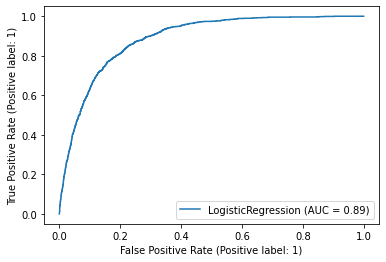

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(lr, X_test, y_test)
print( "AUROC on the sampled dataset using Logistic Regression : ",roc_auc_score( y_test, lr.predict_proba(X_test)[:, 1]))

**2. DECISION TREE:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier() 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.7982133369144445


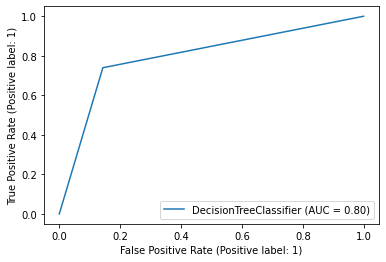

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(dt, X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))


Depth  :  1  Training Accuracy :  0.7773795818323616  Cross val score :  0.8810972717938688
Depth  :  2  Training Accuracy :  0.8222416162216363  Cross val score :  0.8904999266611254
Depth  :  3  Training Accuracy :  0.8724143053440785  Cross val score :  0.8949240942649
Depth  :  4  Training Accuracy :  0.9062836558101534  Cross val score :  0.8995695008067276
Depth  :  5  Training Accuracy :  0.9123927656255802  Cross val score :  0.896252139050506
Depth  :  6  Training Accuracy :  0.9250566346046719  Cross val score :  0.8952568082921821
Depth  :  7  Training Accuracy :  0.9335239722211907  Cross val score :  0.893597516256784
Depth  :  8  Training Accuracy :  0.9437739072306607  Cross val score :  0.8910540018579182
Depth  :  9  Training Accuracy :  0.9509971404166822  Cross val score :  0.8883990123698234
Depth  :  10  Training Accuracy :  0.959928696104282  Cross val score :  0.8917162518945876
Depth  :  20  Training Accuracy :  0.9996471942659784  Cross val score :  0.869041949

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_auc_score 
dt = DecisionTreeClassifier(max_depth=4) 
dt.fit(X_smt,y_smt) 
print(dt.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

0.9062836558101534
AUROC on the sampled dataset :  0.8588238385230251


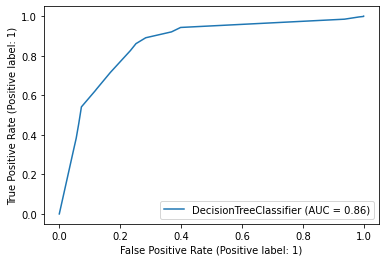

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(dt, X_test, y_test)

# **3. K-NEAREST NEIGHBOUR:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

K value : 1 Cross Value Accuracy : 0.85388867158852
K value : 2 Cross Value Accuracy : 0.8793278492152741
K value : 3 Cross Value Accuracy : 0.8791079548232533
K value : 4 Cross Value Accuracy : 0.8847484476604899
K value : 5 Cross Value Accuracy : 0.8847488143548624
K value : 6 Cross Value Accuracy : 0.8857437784188139
K value : 7 Cross Value Accuracy : 0.8846379504229208
K value : 8 Cross Value Accuracy : 0.8851905588422235
K value : 9 Cross Value Accuracy : 0.8853015450056226
K value : 10 Cross Value Accuracy : 0.8853011783112501
K value : 20 Cross Value Accuracy : 0.884858944898059
K value : 30 Cross Value Accuracy : 0.8847480809661175
K value : 40 Cross Value Accuracy : 0.8843054808585536
K value : 50 Cross Value Accuracy : 0.8833100278687723


In [ ]:
knn= KNeighborsClassifier(6)
knn.fit(X_smt, y_smt)
print(knn.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(X_test)[:, 1]))

0.9915326623834813
AUROC on the sampled dataset :  0.8001474872860821


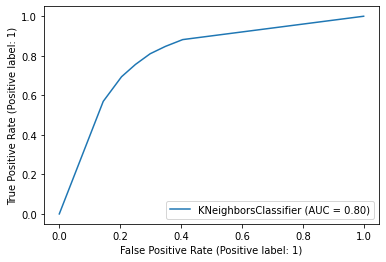

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(knn, X_test, y_test)

**4. XG_BOOST:**


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.8956984305480858
Learning rate :  0.02  Cross-Val score :  0.8953657165208038
Learning rate :  0.03  Cross-Val score :  0.8965826529115534
Learning rate :  0.04  Cross-Val score :  0.8963609250476703
Learning rate :  0.05  Cross-Val score :  0.8982412115582068
Learning rate :  0.1  Cross-Val score :  0.9010071872097003
Learning rate :  0.11  Cross-Val score :  0.900675451034078
Learning rate :  0.12  Cross-Val score :  0.9003433481640835
Learning rate :  0.13  Cross-Val score :  0.9010075539040727
Learning rate :  0.14  Cross-Val score :  0.9027773431770401
Learning rate :  0.15  Cross-Val score :  0.9011179289101842
Learning rate :  0.2  Cross-Val score :  0.903661687771965
Learning rate :  0.5  Cross-Val score :  0.8996807314330418
Learning rate :  0.7  Cross-Val score :  0.8968048697012664
Learning rate :  1  Cross-Val score :  0.8940395052070602


AUROC on the sampled dataset :  0.9083898428787462


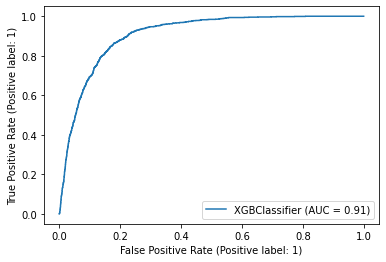

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
model = xgb.XGBClassifier(learning_rate = 0.2, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)
plot_roc_curve(model, X_test, y_test)
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, model.predict_proba(X_test)[:, 1]))

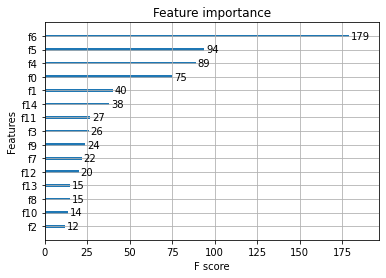

In [ ]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [ ]:
X_smt

array([[54,  0,  1, ...,  0,  0,  1],
       [53,  2,  1, ...,  0,  0,  1],
       [28,  7,  1, ...,  0,  0,  0],
       ...,
       [40,  9,  1, ...,  0,  0,  0],
       [46,  6,  1, ...,  0,  0,  0],
       [32,  1,  1, ...,  0,  0,  1]])

# **5. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy") 
classifier.fit(X_smt, y_smt) 
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

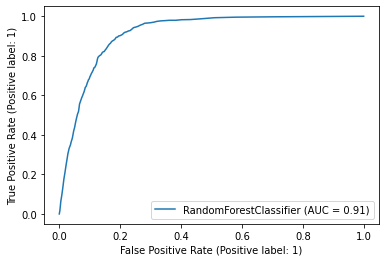

In [ ]:
plot_roc_curve(classifier, X_test, y_test)

In [ ]:
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, classifier.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.9126476478522092


In [ ]:
data.columns

Index(['age', 'job', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'y', 'marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown'],
      dtype='object')

# **Finding the Best Model:**

In [ ]:
# print( "AUROC on the sampled dataset-Logistic Regression : ",roc_auc_score( y_test, lr.predict_proba(X_test)[:, 1]))
# print( "AUROC on the sampled dataset-Decision Tree : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))
# print( "AUROC on the sampled dataset-K nearest neighbour : ",roc_auc_score( y_test, knn.predict_proba(X_test)[:, 1]))
# print( "AUROC on the sampled dataset-Xg_boost : ",roc_auc_score( y_test, model.predict_proba(X_test)[:, 1]))
# print( "AUROC on the sampled dataset-Random forest : ",roc_auc_score( y_test, classifier.predict_proba(X_test)[:, 1]))

# **Feature Selection:**

In [ ]:
importance = classifier.feature_importances_ 
feature_importances = list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'marital_divorced', 'marital_married', 'marital_single', 'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success', 'prev_outcome_unknown'])) 
feature_importances = sorted(feature_importances, key = lambda x: x[0], reverse = True) 
feature_importances

[(0.39891519202879666, 'dur'),
 (0.100551901564936, 'mon'),
 (0.09663869345509166, 'prev_outcome_unknown'),
 (0.0671595053072895, 'age'),
 (0.05881966918477358, 'day'),
 (0.04624378024737819, 'prev_outcome_failure'),
 (0.04369265881242746, 'job'),
 (0.0389578275713647, 'num_calls'),
 (0.036591516417899365, 'marital_married'),
 (0.028028935458531457, 'marital_single'),
 (0.0260438169633773, 'marital_divorced'),
 (0.01948577053301005, 'prev_outcome_other'),
 (0.016604875954179237, 'call_type'),
 (0.014825540403693145, 'education_qual'),
 (0.007440316097251813, 'prev_outcome_success')]

In [ ]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [ ]:
data.columns

Index(['age', 'job', 'education_qual', 'call_type', 'day', 'mon', 'dur',
       'num_calls', 'y', 'marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown'],
      dtype='object')

# **Deployment:**

In [ ]:
%%writefile app.py
import pickle
import pandas as pd
import streamlit as st

from PIL import Image

pickle_in = open("classifier.pkl","rb")
classifier=pickle.load(pickle_in)

def main():
    # Create a page dropdown
    #image = Image.open('hsv.jpg')
    #st.sidebar.image(image,width=100)
    st.sidebar.title("Guvi_Insurance")
    col1, col2 = st.columns( [0.5, 0.5])
    with col1:
        st.title("Guvi_Insurance")   
    #with col2:
    #   st.image(image,  width=150)
    page = st.sidebar.selectbox("Select One", ['ABOUT',"PREDICTION"])
    if page == "ABOUT":
        st.title('Welcome to Guvi_Insurance')
        st.subheader('.')
        st.write('Creator Profile:')
        st.write('**Creators:** Jayabarathi')
        st.write('**Creators:** Kaviarasan K G')
        st.write('**Creators:** Ashwin')

    if page == "PREDICTION":
        st.title('PREDICTION')
        age = st.slider("select the age of the person",int(data.age.min()),int(data.age.max()))
        job = st.selectbox("Select the occupation ",data.job.unique())
        if job == 'blue-collar':
            grouped=data[data['job']=='blue-collar']
            job = 0
        elif job == 'entrepreneur':
            grouped=data[data['job']=='entrepreneur']
            job = 1
        elif job == 'housemaid':
            grouped=data[data['job']=='housemaid']
            job = 2
        elif job == 'services':
            grouped=data[data['job']=='services']
            job = 3
        elif job == 'technician':
            grouped=data[data['job']=='technician']
            job = 4
        elif job == 'technician':
            grouped=data[data['job']=='unknown']
            job = 5
        elif job == 'self-employed':
            grouped=data[data['job']=='self-employed']
            job = 6
        elif job == 'admin.':
            grouped=data[data['job']=='admin.']
            job=7
        elif job == 'management':
            grouped=data[data['job']=='management']
            job=8
        elif job == 'unemployed':
            grouped=data[data['job']=='unemployed']
            job=9
        elif job == 'retired':
            grouped=data[data['job']=='retired']
            job=10
        elif job == 'student':
            grouped=data[data['job']=='student']
            job=11
        
        education_qual = st.selectbox("Select the education_qualification ",data.education_qual.unique())
        if education_qual == 'primary':
            grouped=data[data['education_qual']=='primary']
            education_qual = 0
        elif education_qual == 'secondary':
            grouped=data[data['education_qual']=='secondary']
            education_qual=1
        elif education_qual == 'unknown':
            grouped=data[data['education_qual']=='unknown']
            education_qual=2
        elif education_qual == 'tertiary':
            grouped=data[data['education_qual']=='tertiary']
            education_qual=3

        day = st.slider("select the day ",int(data.day.min()),int(data.day.max()))
        st.write('**from 0 to 11 is jan to dec')
        mon = st.slider("select the month ",int(data.mon.min()),int(data.mon.max()))
        dur = st.slider("select the call duration ",int(data.dur.min()),int(data.dur.max()))
        num_calls = st.slider("select the no of calls ",int(data.num_calls.min()),int(data.num_calls.max()))


        marital_divorced = st.radio("marital_divorced",data.marital_divorced.unique())
        if marital_divorced == 'Yes':
            marital_divorced = 1
        else:
            marital_divorced = 0
        
        marital_married = st.radio("marital_married",data.marital_married.unique())
        if marital_married == 'Yes':
            marital_married = 1
        else:
            marital_married = 0
        
        marital_single = st.radio("marital_single",data.marital_single.unique())
        if marital_single == 'Yes':
            marital_single = 1
        else:
            marital_single = 0
        
        prev_outcome_failure = st.radio("prev_outcome_failure",data.prev_outcome_failure.unique())
        if prev_outcome_failure == 'Yes':
            prev_outcome_failure=1
        else:
            prev_outcome_failure=0

        prev_outcome_other = st.radio("prev_outcome_other",data.prev_outcome_other.unique())
        if prev_outcome_other == 'Yes':
            prev_outcome_other=1
        else:
            prev_outcome_other=0
        
        prev_outcome_success = st.radio("prev_outcome_success",data.prev_outcome_success.unique())
        if prev_outcome_success == 'Yes':
            prev_outcome_success=1
        else:
            prev_outcome_success=0

        input = pd.DataFrame([age,job,education_qual,call_type, day, mon, dur,num_calls, marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown],columns=['age', 'job', 'education_qual', 'call_type', 'day', 'mon', 'dur','num_calls', 'marital_divorced', 'marital_married','marital_single', 'prev_outcome_failure', 'prev_outcome_other','prev_outcome_success', 'prev_outcome_unknown'],index=['index'])


        if st.button("Predict"):
            valu = classifier.predict(input)
            if valu==0:
                st.write('DECLINED')
            else:
                st.write('ACCEPTED')
                st.snow()

        if st.button("About"):
        st.text("Lets Learn")
        st.text("Built with Streamlit")

if __name__=='__main__':
    main()

Writing app.py


In [ ]:
!pip freeze >requirements.txt

In [ ]:
print('Hello')

Hello
